In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'xsec_comparsion_generators/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.18/04


In [2]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [3]:
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_comparison_generators.root","RECREATE");


In [4]:
def draw_adding():
    pot_data = 7.644e18
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/25.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/20.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [5]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


[[6.60875441e-03 1.09487787e-02 5.12738482e-03 1.68386523e-03
  4.04931462e-04 3.82886141e-05]
 [1.09487787e-02 6.84751106e-02 2.94344749e-02 1.48213667e-02
  3.61324357e-03 3.23893637e-04]
 [5.12738482e-03 2.94344749e-02 3.23873027e-02 1.41410513e-02
  3.75643817e-03 2.94498342e-04]
 [1.68386523e-03 1.48213667e-02 1.41410513e-02 1.46919156e-02
  3.52874522e-03 2.42653200e-04]
 [4.04931462e-04 3.61324357e-03 3.75643817e-03 3.52874522e-03
  1.52167633e-03 7.26742938e-05]
 [3.82886141e-05 3.23893637e-04 2.94498342e-04 2.42653200e-04
  7.26742938e-05 1.86633835e-05]]


'\nlegend = ROOT.TLegend(0.45,0.35,0.95,0.9); #LEGEND RIGHT\nlegend.AddEntry(h_xsec_data,\'xsec data (forw. fold.)\',"f")\nlegend.AddEntry(h_mc,\'mc tune3 (forw. fold.)\',"f") #+\'/{:04.2f})\'.format(chi2_mc/6)\nlegend.AddEntry(h_mc_noTune,\'mc no tune (forw. fold.)\',"f")\nlegend.AddEntry(h_g2,\'genie v2 (smeared)\',"f")\nlegend.AddEntry(h_g3,\'genie v3 (smeared)\',"f")\nlegend.AddEntry(h_nuwro,\'nuwro (smeared)\',"f")\nlegend.AddEntry(h_gibuu,\'gibuu (smeared)\',"f")\nlegend.AddEntry(h_neut,\'neut (smeared)\',"f")\n#legend.AddEntry(h_neut,\'neut\',"f")\nlegend.Draw()\n\nc1.Draw()\nc1.SaveAs(outputdir_png + "h_xsec_generators_nochi.png")\nc1.SaveAs(outputdir_root + "h_xsec_generators_nochi.root")\nc1.SaveAs(outputdir_pdf + "h_xsec_generators_nochi.pdf")\n'

Chi2 = 39.733155, Prob = 1.6903e-07, NDF = 5, igood = 1
Chi2 = 48.153350, Prob = 3.30489e-09, NDF = 5, igood = 1


Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/png/h_xsec_generators.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/root/h_xsec_generators.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/pdf/h_xsec_generators.pdf has been created


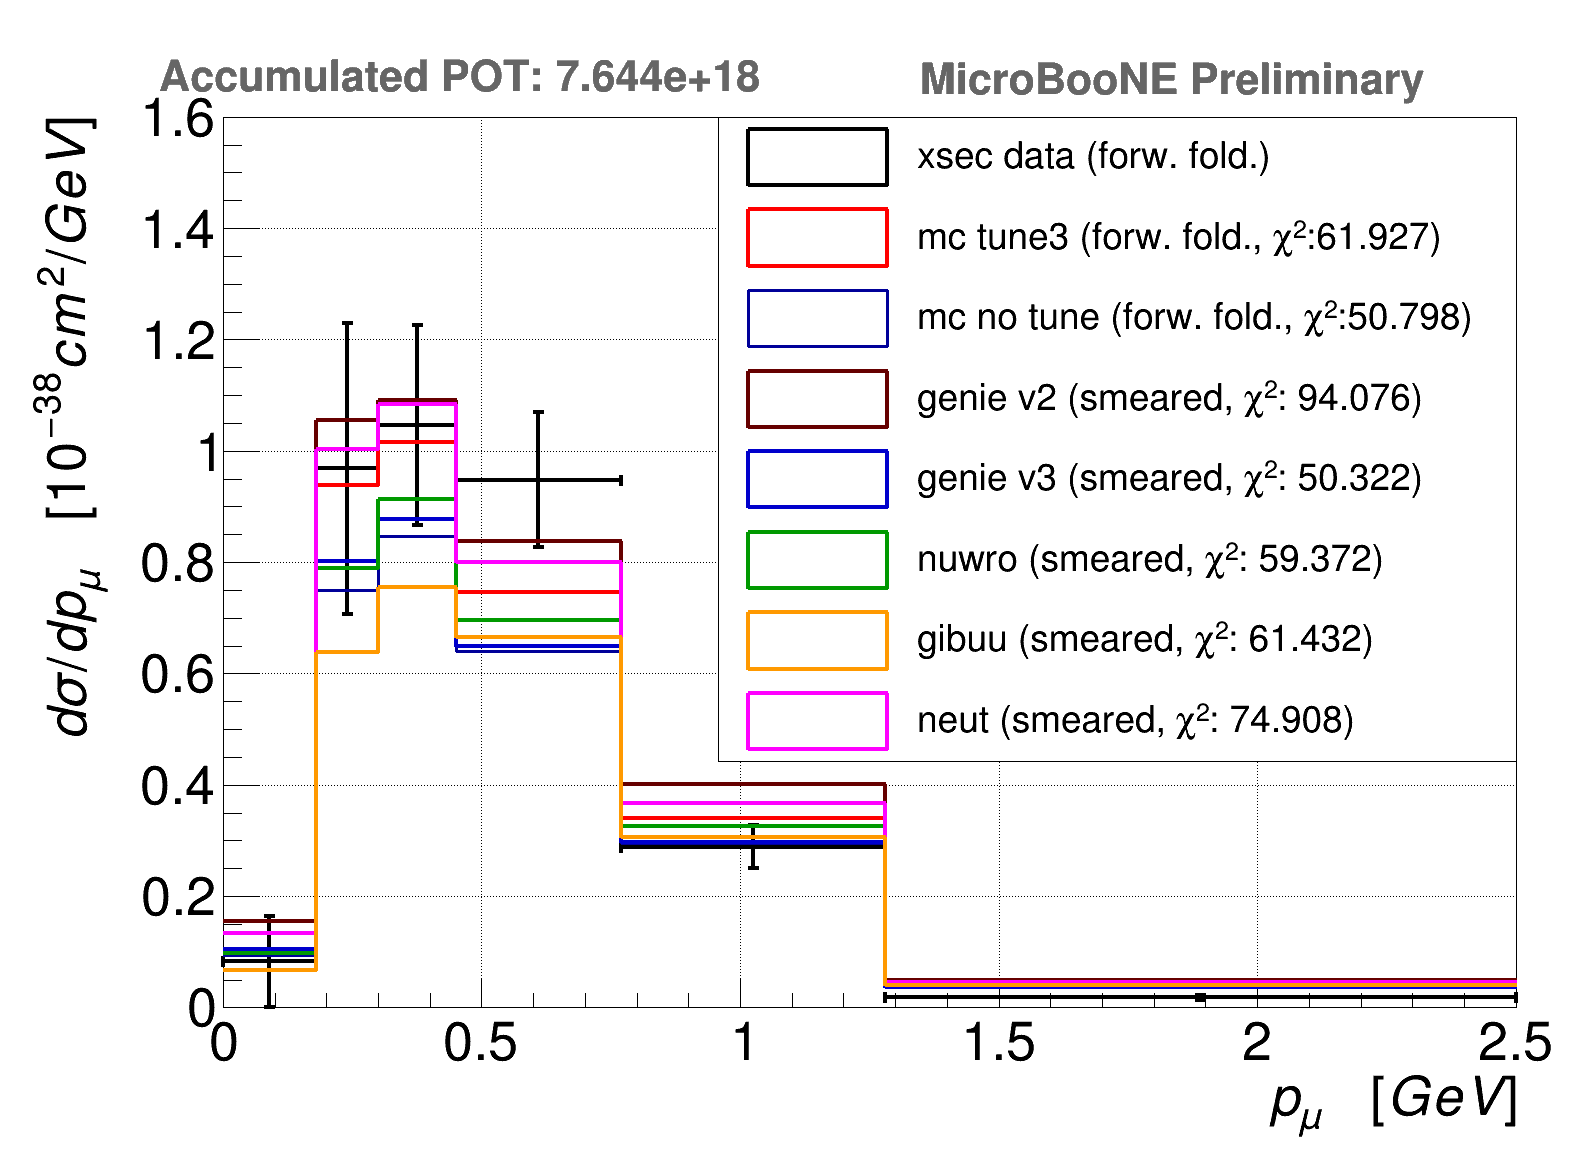

In [6]:
path_cv = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
path = '/home/tmettler/Share/data_hist/'
f_cv = ROOT.TFile.Open(path_cv+"xsec_momentum_result.root", 'read')

f_g2 = ROOT.TFile.Open(path+"ccinc_tom_genie2_res.root", 'read')
f_g3 = ROOT.TFile.Open(path+"ccinc_tom_genie3_res.root", 'read')
f_gibuu = ROOT.TFile.Open(path+"ccinc_tom_gibuu_res.root", 'read')
f_nuwro = ROOT.TFile.Open(path+"ccinc_tom_nuwro_res.root", 'read')
f_neut = ROOT.TFile.Open(path+"ccinc_tom_neut_res.root", 'read')

h_xsec_data = f_cv.Get('xsec_data')
#h_xsec_data.Scale(1e-38)
h_mc = f_cv.Get('xsec_mc')
h_mc.SetFillColor(0)
h_mc_noTune = f_cv.Get('xsec_mc_noTune')
h_mc_noTune.SetFillColor(0)
h_covariance_matrix = f_cv.Get('covariance_matrix')
h_smearing_matrix = f_cv.Get('smearing_matrix')

res = np.zeros((9))
chi2_nom =h_xsec_data.Chi2Test(h_mc,"WW P CHI2",res)
chi2_nom =h_xsec_data.Chi2Test(h_mc_noTune,"WW P CHI2",res)


binnum = h_xsec_data.GetNbinsX()

h_xsec_data.GetYaxis().SetTitleSize(0.05)
h_xsec_data.GetYaxis().SetTitleOffset(0.0)
h_xsec_data.GetYaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleSize(0.05)
h_xsec_data.GetXaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleOffset(1)
h_xsec_data.SetLineColor(ROOT.kBlack)
h_xsec_data.SetLineWidth(4)
h_xsec_data.SetMinimum(0)
h_xsec_data.SetMaximum(1.6)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

mitigation_matrix = np.zeros((7,7))
for i in range(1,binnum+1):
    for j in range(1,binnum+1):
        mitigation_matrix[i-1,j-1]= h_smearing_matrix.GetBinContent(i,j)

h_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC')
h_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC')
h_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC')
h_neut = f_neut.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC')
h_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC')

h_g3_true = f_g3.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC_truth')
h_g3_smeare = h_g3_true.Clone()

true_bins = np.zeros((binnum+1))
for i in range(0,binnum+1):
    true_bins[i] = h_g3_true.GetBinContent(i+1)*h_g3_true.GetBinWidth(i+1)
true_bins_smeared = np.zeros((binnum+1))

true_bins_smeared = mitigation_matrix.dot(true_bins)
#sel_smeared = mitigation_matrix.dot(sel_smeared)


for i in range(1,binnum+1):
    h_g3_smeare.SetBinContent(i,true_bins_smeared[i-1]/h_g3_true.GetBinWidth(i))

h_g2.Scale(1e38)
h_g3.Scale(1e38)
h_nuwro.Scale(1e38)
h_gibuu.Scale(1e38)
h_neut.Scale(1e38)

h_nuwro.SetLineColor(ROOT.kGreen+2)
h_gibuu.SetLineColor(ROOT.kOrange-3)
h_g2.SetLineColor(ROOT.kRed+3)
h_g3.SetLineColor(ROOT.kBlue+1)
h_neut.SetLineColor(ROOT.kMagenta)

h_nuwro.SetLineWidth(4)
h_gibuu.SetLineWidth(4)
h_g2.SetLineWidth(4)
h_g3.SetLineWidth(4)
h_neut.SetLineWidth(4)

h_g3_smeare.Scale(1e38)
h_g3_smeare.SetLineColor(ROOT.kPink)
h_g3_smeare.SetLineWidth(2)

h_xsec_data.Draw('E1')
h_mc.Draw('same hist')
h_mc_noTune.Draw('same hist')

h_g2.Draw('same hist')
h_g3.Draw('same hist')
#h_g3_smeare.Draw('same hsit')
h_nuwro.Draw('same hist')
h_neut.Draw('same hist')
h_gibuu.Draw('same hist')

# calculate the chi2 for all these models..
#h_covariance_matrix
cov_matrix = np.zeros((6,6))
for i in range(1,7):
    for j in range(1,7):
        cov_matrix[i-1][j-1] = h_covariance_matrix.GetBinContent(i,j)
        
print cov_matrix

xsec_diff_mc = np.zeros((6))
xsec_diff_mc_noTune = np.zeros((6))

for i in range(1,7):
    #print h_xsec_data.GetBinContent(i), h_mc.GetBinContent(i)
    xsec_diff_mc[i-1] = (h_xsec_data.GetBinContent(i) - h_mc.GetBinContent(i) )#*1e-38
    xsec_diff_mc_noTune[i-1] = (h_xsec_data.GetBinContent(i) - h_mc_noTune.GetBinContent(i) )#*1e-38
    
cov_matrix_inv = np.linalg.inv(cov_matrix)

chi2_mc = np.dot(xsec_diff_mc,cov_matrix_inv)
chi2_mc = np.dot(chi2_mc,xsec_diff_mc)

chi2_mc_noTune = np.dot(xsec_diff_mc_noTune,cov_matrix_inv)
chi2_mc_noTune = np.dot(chi2_mc_noTune,xsec_diff_mc_noTune)


legend = ROOT.TLegend(0.45,0.35,0.95,0.9); #LEGEND RIGHT
legend.AddEntry(h_xsec_data,'xsec data (forw. fold.)',"f")
legend.AddEntry(h_mc,'mc tune3 (forw. fold., #chi^{2}:'+'{:04.3f})'.format(chi2_mc),"f") #+'/{:04.2f})'.format(chi2_mc/6)
legend.AddEntry(h_mc_noTune,'mc no tune (forw. fold., #chi^{2}:'+'{:04.3f})'.format(chi2_mc_noTune),"f")
legend.AddEntry(h_g2,'genie v2 (smeared, #chi^{2}: '+h_g2.GetTitle()+')',"f")
legend.AddEntry(h_g3,'genie v3 (smeared, #chi^{2}: '+h_g3.GetTitle()+')',"f")
legend.AddEntry(h_nuwro,'nuwro (smeared, #chi^{2}: '+h_nuwro.GetTitle()+')',"f")
legend.AddEntry(h_gibuu,'gibuu (smeared, #chi^{2}: '+h_gibuu.GetTitle()+')',"f")
legend.AddEntry(h_neut,'neut (smeared, #chi^{2}: '+h_neut.GetTitle()+')',"f")
#legend.AddEntry(h_neut,'neut',"f")
legend.Draw()

prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_generators.png")
c1.SaveAs(outputdir_root + "h_xsec_generators.root")
c1.SaveAs(outputdir_pdf + "h_xsec_generators.pdf")
'''
legend = ROOT.TLegend(0.45,0.35,0.95,0.9); #LEGEND RIGHT
legend.AddEntry(h_xsec_data,'xsec data (forw. fold.)',"f")
legend.AddEntry(h_mc,'mc tune3 (forw. fold.)',"f") #+'/{:04.2f})'.format(chi2_mc/6)
legend.AddEntry(h_mc_noTune,'mc no tune (forw. fold.)',"f")
legend.AddEntry(h_g2,'genie v2 (smeared)',"f")
legend.AddEntry(h_g3,'genie v3 (smeared)',"f")
legend.AddEntry(h_nuwro,'nuwro (smeared)',"f")
legend.AddEntry(h_gibuu,'gibuu (smeared)',"f")
legend.AddEntry(h_neut,'neut (smeared)',"f")
#legend.AddEntry(h_neut,'neut',"f")
legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_generators_nochi.png")
c1.SaveAs(outputdir_root + "h_xsec_generators_nochi.root")
c1.SaveAs(outputdir_pdf + "h_xsec_generators_nochi.pdf")
'''

[[6.60875441e-03 1.09487787e-02 5.12738482e-03 1.68386523e-03
  4.04931462e-04 3.82886141e-05]
 [1.09487787e-02 6.84751106e-02 2.94344749e-02 1.48213667e-02
  3.61324357e-03 3.23893637e-04]
 [5.12738482e-03 2.94344749e-02 3.23873027e-02 1.41410513e-02
  3.75643817e-03 2.94498342e-04]
 [1.68386523e-03 1.48213667e-02 1.41410513e-02 1.46919156e-02
  3.52874522e-03 2.42653200e-04]
 [4.04931462e-04 3.61324357e-03 3.75643817e-03 3.52874522e-03
  1.52167633e-03 7.26742938e-05]
 [3.82886141e-05 3.23893637e-04 2.94498342e-04 2.42653200e-04
  7.26742938e-05 1.86633835e-05]]
Chi2 = 39.733155, Prob = 1.6903e-07, NDF = 5, igood = 1
Chi2 = 48.153350, Prob = 3.30489e-09, NDF = 5, igood = 1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/png/h_xsec_corr_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/root/h_xsec_corr_ratio.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/pdf/h_xsec_corr_ratio.pdf has been created


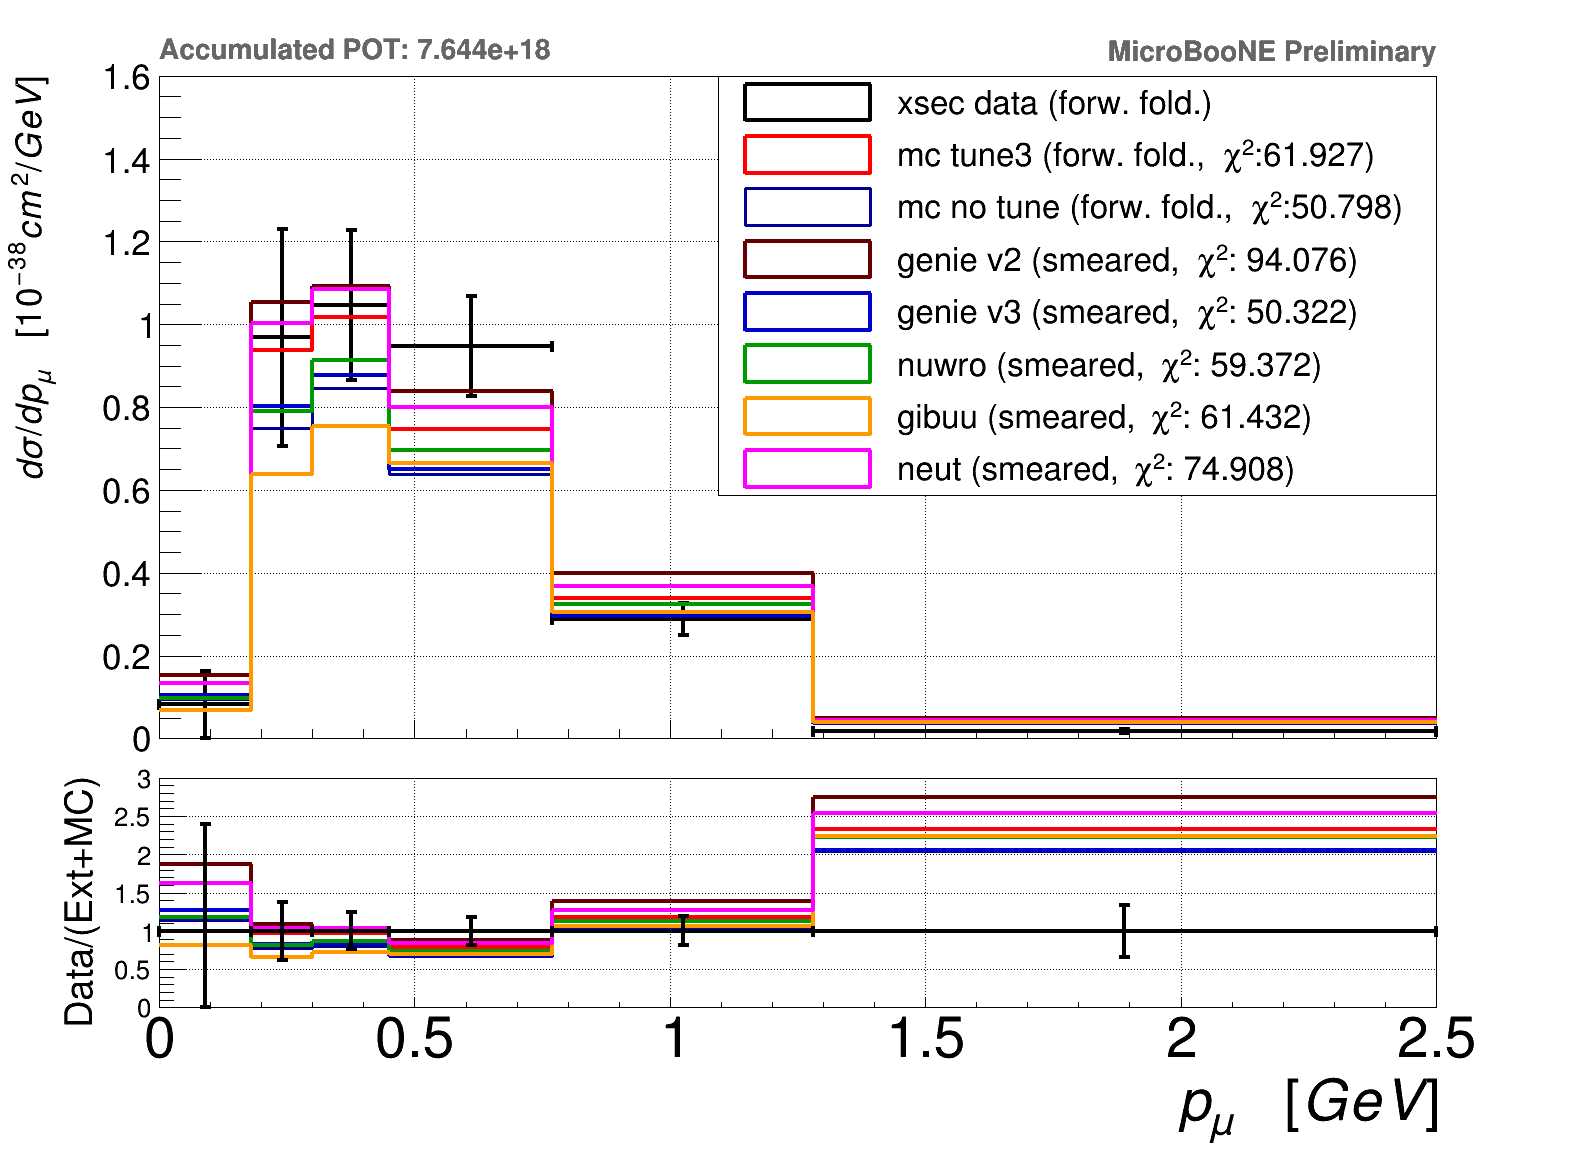

In [7]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

f_g2 = ROOT.TFile.Open(path+"ccinc_tom_genie2_res.root", 'read')
f_g3 = ROOT.TFile.Open(path+"ccinc_tom_genie3_res.root", 'read')
f_gibuu = ROOT.TFile.Open(path+"ccinc_tom_gibuu_res.root", 'read')
f_nuwro = ROOT.TFile.Open(path+"ccinc_tom_nuwro_res.root", 'read')
f_neut = ROOT.TFile.Open(path+"ccinc_tom_neut_res.root", 'read')

h_xsec_data = f_cv.Get('xsec_data')
#h_xsec_data.Scale(1e-38)
h_mc = f_cv.Get('xsec_mc')
h_mc.SetFillColor(0)
h_mc_noTune = f_cv.Get('xsec_mc_noTune')
h_mc_noTune.SetFillColor(0)
h_covariance_matrix = f_cv.Get('covariance_matrix')
h_smearing_matrix = f_cv.Get('smearing_matrix')

res = np.zeros((9))
chi2_nom =h_xsec_data.Chi2Test(h_mc,"WW P CHI2",res)
chi2_nom =h_xsec_data.Chi2Test(h_mc_noTune,"WW P CHI2",res)


binnum = h_xsec_data.GetNbinsX()

h_xsec_data.GetYaxis().SetTitleSize(0.05)
h_xsec_data.GetYaxis().SetTitleOffset(0.0)
h_xsec_data.GetYaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleSize(0.05)
h_xsec_data.GetXaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleOffset(1)
h_xsec_data.SetLineColor(ROOT.kBlack)
h_xsec_data.SetLineWidth(4)
h_xsec_data.SetMinimum(0)
h_xsec_data.SetMaximum(1.6)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

mitigation_matrix = np.zeros((7,7))
for j in range(1,binnum+2):
    for i in range(1,binnum+2):
        mitigation_matrix[i-1,j-1]= h_smearing_matrix.GetBinContent(i,j)

h_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC')
h_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC')
h_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC')
h_neut = f_neut.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC')
h_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC')

h_g2.Scale(1e38)
h_g3.Scale(1e38)
h_nuwro.Scale(1e38)
h_gibuu.Scale(1e38)
h_neut.Scale(1e38)

h_nuwro.SetLineColor(ROOT.kGreen+2)
h_gibuu.SetLineColor(ROOT.kOrange-3)
h_g2.SetLineColor(ROOT.kRed+3)
h_g3.SetLineColor(ROOT.kBlue+1)
h_neut.SetLineColor(ROOT.kMagenta)

h_nuwro.SetLineWidth(4)
h_gibuu.SetLineWidth(4)
h_g2.SetLineWidth(4)
h_g3.SetLineWidth(4)
h_neut.SetLineWidth(4)


h_xsec_data.GetYaxis().SetTitleSize(0.05)
h_xsec_data.GetYaxis().SetTitleOffset(0.0)
h_xsec_data.GetYaxis().SetLabelSize(0.05)
#h_overlay_sig.GetXaxis().SetTitleSize(0.05)
#h_overlay_sig.GetXaxis().SetLabelSize(0.05)


h_xsec_data.Draw('E1')
h_mc.Draw('same hist')
h_mc_noTune.Draw('same hist')

h_g2.Draw('same hist')
h_g3.Draw('same hist')
h_nuwro.Draw('same hist')
h_neut.Draw('same hist')
h_gibuu.Draw('same hist')

# calculate the chi2 for all these models..
#h_covariance_matrix
cov_matrix = np.zeros((6,6))
for i in range(1,7):
    for j in range(1,7):
        cov_matrix[i-1][j-1] = h_covariance_matrix.GetBinContent(i,j)
        
print cov_matrix

xsec_diff_mc = np.zeros((6))
xsec_diff_mc_noTune = np.zeros((6))

for i in range(1,7):
    #print h_xsec_data.GetBinContent(i), h_mc.GetBinContent(i)
    xsec_diff_mc[i-1] = (h_xsec_data.GetBinContent(i) - h_mc.GetBinContent(i) )#*1e-38
    xsec_diff_mc_noTune[i-1] = (h_xsec_data.GetBinContent(i) - h_mc_noTune.GetBinContent(i) )#*1e-38
    
cov_matrix_inv = np.linalg.inv(cov_matrix)

chi2_mc = np.dot(xsec_diff_mc,cov_matrix_inv)
chi2_mc = np.dot(chi2_mc,xsec_diff_mc)

chi2_mc_noTune = np.dot(xsec_diff_mc_noTune,cov_matrix_inv)
chi2_mc_noTune = np.dot(chi2_mc_noTune,xsec_diff_mc_noTune)


legend = ROOT.TLegend(0.45,0.35,0.9,0.9); #LEGEND RIGHT
legend.AddEntry(h_xsec_data,'xsec data (forw. fold.)',"f")
legend.AddEntry(h_mc,'mc tune3 (forw. fold., #chi^{2}:'+'{:04.3f})'.format(chi2_mc),"f") #+'/{:04.2f})'.format(chi2_mc/6)
legend.AddEntry(h_mc_noTune,'mc no tune (forw. fold., #chi^{2}:'+'{:04.3f})'.format(chi2_mc_noTune),"f")
legend.AddEntry(h_g2,'genie v2 (smeared, #chi^{2}: '+h_g2.GetTitle()+')',"f")
legend.AddEntry(h_g3,'genie v3 (smeared, #chi^{2}: '+h_g3.GetTitle()+')',"f")
legend.AddEntry(h_nuwro,'nuwro (smeared, #chi^{2}: '+h_nuwro.GetTitle()+')',"f")
legend.AddEntry(h_gibuu,'gibuu (smeared, #chi^{2}: '+h_gibuu.GetTitle()+')',"f")
legend.AddEntry(h_neut,'neut (smeared, #chi^{2}: '+h_neut.GetTitle()+')',"f")
#legend.AddEntry(h_neut,'neut',"f")
legend.Draw()

prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()

h_xsec_data.GetXaxis().SetLabelOffset(999);
h_xsec_data.GetXaxis().SetTitleOffset(999);
h_xsec_data.GetXaxis().SetLabelSize(0);
h_xsec_data.GetXaxis().SetTitleSize(0);

c1.cd()
h_xsec_data.GetXaxis().SetLabelOffset(0);
h_xsec_data.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()

h_xsec_data_ratio = h_xsec_data.Clone()
h_xsec_data_ratio.Divide(h_xsec_data)
h_mc_ratio = h_mc.Clone()
h_mc_ratio.Divide(h_xsec_data)
h_mc_noTune_ratio = h_mc_noTune.Clone()
h_mc_noTune_ratio.Divide(h_xsec_data)

h_g2_ratio = h_g2.Clone()
h_g2_ratio.Divide(h_xsec_data)
h_g3_ratio = h_g3.Clone()
h_g3_ratio.Divide(h_xsec_data)
h_nuwro_ratio = h_nuwro.Clone()
h_nuwro_ratio.Divide(h_xsec_data)
h_gibuu_ratio = h_gibuu.Clone()
h_gibuu_ratio.Divide(h_xsec_data)
h_neut_ratio = h_neut.Clone()
h_neut_ratio.Divide(h_xsec_data)

h_xsec_data_ratio.SetMinimum(0)
h_xsec_data_ratio.SetMaximum(3)
#h_overlay_sig_ratio.SetFillColor(0)
h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)

h_xsec_data_ratio.Draw('E1')
h_mc_ratio.Draw('hist same')
h_mc_noTune_ratio.Draw('same hist')
h_g2_ratio.Draw('same hist')
h_g3_ratio.Draw('hist same')
h_nuwro_ratio.Draw('hist same')
h_gibuu_ratio.Draw('hist same')
h_neut_ratio.Draw('hist same')

h_xsec_data_ratio.Draw('E1 same')



c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr_ratio.png")
c1.SaveAs(outputdir_root + "h_xsec_corr_ratio.root")
c1.SaveAs(outputdir_pdf + "h_xsec_corr_ratio.pdf")

#h_data.Write("h_xsec_data")
#h_overlay_sig.Write("h_xsec_MC")

In [11]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


bin number:  9
[[ 1.57607475e-03  4.13749223e-04  2.21659327e-04  7.77871025e-04
   1.81150722e-03  2.28124481e-03  2.02874245e-03  3.84829979e-03
   5.11279092e-03]
 [ 4.13749223e-04  1.19361074e-03  8.96396810e-04  1.05640813e-03
   9.16602087e-04  1.52355117e-03  2.62611645e-03  3.37785929e-03
   3.42734203e-03]
 [ 2.21659327e-04  8.96396810e-04  1.19341763e-02  5.22956819e-03
  -2.55412238e-03 -5.00595179e-05  8.46708630e-03  1.92672911e-03
  -4.24044699e-03]
 [ 7.77871025e-04  1.05640813e-03  5.22956819e-03  6.85247787e-03
   9.04251702e-04  2.93002202e-03  7.65845355e-03  6.37490133e-03
   4.14376760e-03]
 [ 1.81150722e-03  9.16602087e-04 -2.55412238e-03  9.04251702e-04
   1.18161969e-02  8.84265940e-03  5.27060914e-03  1.43231032e-02
   1.79710576e-02]
 [ 2.28124481e-03  1.52355117e-03 -5.00595179e-05  2.93002202e-03
   8.84265940e-03  1.77916463e-02  1.04950463e-02  1.99831686e-02
   2.35162879e-02]
 [ 2.02874245e-03  2.62611645e-03  8.46708630e-03  7.65845355e-03
   5.27060914

'\nlegend = ROOT.TLegend(0.15,0.35,0.55,0.9); #LEGEND RIGHT\nlegend.AddEntry(h_xsec_data,\'xsec data (forw. fold.)\',"f")\nlegend.AddEntry(h_mc,\'mc tune3 (forw. fold.)\',"f") #+\'/{:04.2f})\'.format(chi2_mc/6)\nlegend.AddEntry(h_mc_noTune,\'mc no tune (forw. fold.)\',"f")\nlegend.AddEntry(h_g2,\'genie v2 (smeared)\',"f")\nlegend.AddEntry(h_g3,\'genie v3 (smeared)\',"f")\nlegend.AddEntry(h_nuwro,\'nuwro (smeared)\',"f")\nlegend.AddEntry(h_gibuu,\'gibuu (smeared)\',"f")\nlegend.AddEntry(h_neut,\'neut (smeared)\',"f")\n#legend.AddEntry(h_neut,\'neut\',"f")\nlegend.Draw()\n\nc1.Draw()\nc1.SaveAs(outputdir_png + "h_xsec_generators_theta_nochi.png")\nc1.SaveAs(outputdir_root + "h_xsec_generators_theta_nochi.root")\nc1.SaveAs(outputdir_pdf + "h_xsec_generators_theta_nochi.pdf")\n'

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/png/h_xsec_generators_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/root/h_xsec_generators_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/pdf/h_xsec_generators_theta.pdf has been created


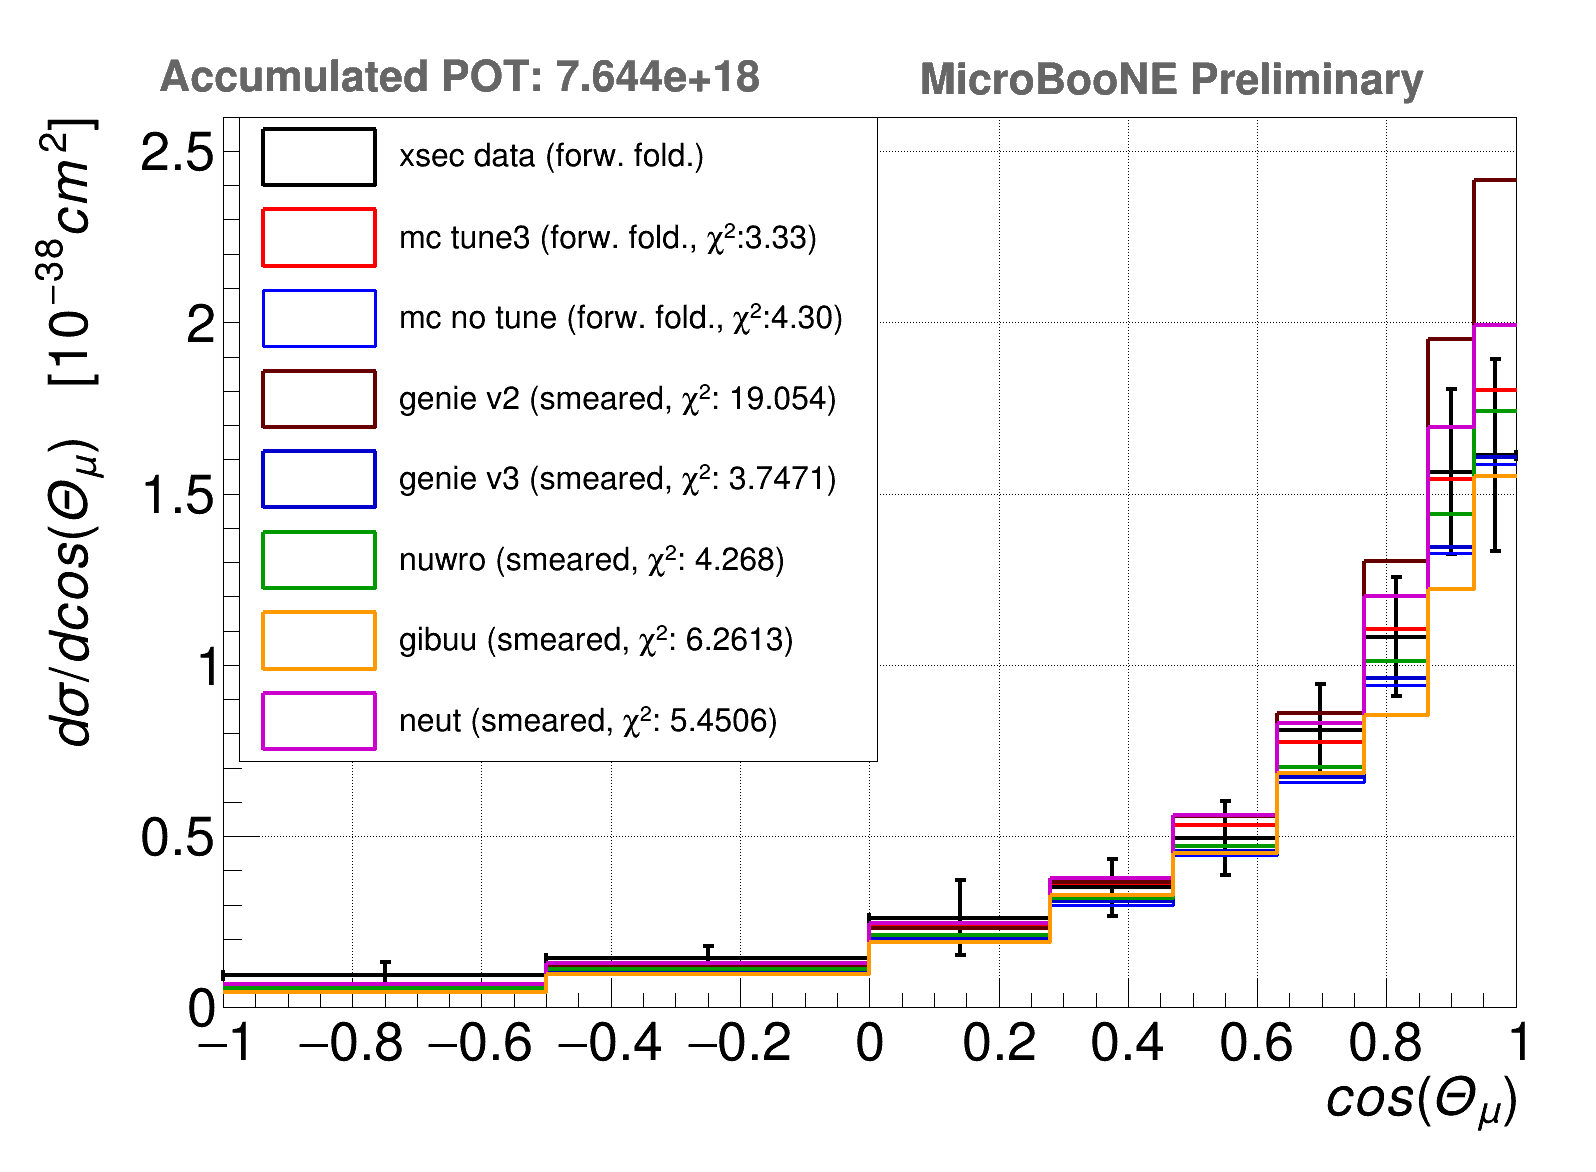

In [13]:
#path_cv = '/home/tmettler/Desktop/weighted/xsec_filesV4/'
#path = '/home/tmettler/Share/data_hist/'
f_cv = ROOT.TFile.Open(path_cv+"xsec_theta_result.root", 'read')

f_g2 = ROOT.TFile.Open(path+"ccinc_tom_genie2_res.root", 'read')
f_g3 = ROOT.TFile.Open(path+"ccinc_tom_genie3_res.root", 'read')
f_gibuu = ROOT.TFile.Open(path+"ccinc_tom_gibuu_res.root", 'read')
f_nuwro = ROOT.TFile.Open(path+"ccinc_tom_nuwro_res.root", 'read')
f_neut = ROOT.TFile.Open(path+"ccinc_tom_neut_res.root", 'read')


h_xsec_data = f_cv.Get('xsec_data')
#h_xsec_data.Scale(1e-38)
h_mc = f_cv.Get('xsec_mc')
h_mc.SetFillColor(0)
h_mc_noTune = f_cv.Get('xsec_mc_noTune')
h_mc_noTune.SetFillColor(0)
h_covariance_matrix = f_cv.Get('covariance_matrix')
h_smearing_matrix = f_cv.Get('smearing_matrix')

binnum = h_xsec_data.GetNbinsX()
print "bin number: ",binnum
h_xsec_data.GetYaxis().SetTitleSize(0.05)
h_xsec_data.GetYaxis().SetTitleOffset(0.0)
h_xsec_data.GetYaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleSize(0.05)
h_xsec_data.GetXaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleOffset(1)
h_xsec_data.SetLineColor(ROOT.kBlack)
h_xsec_data.SetLineWidth(4)
h_xsec_data.SetMinimum(0)
h_xsec_data.SetMaximum(2.6)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

mitigation_matrix = np.zeros((9,9))
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        mitigation_matrix[i-1,j-1]= h_smearing_matrix.GetBinContent(i,j)

h_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_MC')
h_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_MC')
h_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_MC')
h_neut = f_neut.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_MC')
h_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_MC')

h_g2.Scale(1e38)
h_g3.Scale(1e38)
h_nuwro.Scale(1e38)
h_gibuu.Scale(1e38)
h_neut.Scale(1e38)


h_nuwro.SetLineColor(ROOT.kGreen+2)
h_gibuu.SetLineColor(ROOT.kOrange-3)
h_g2.SetLineColor(ROOT.kRed+3)
h_g3.SetLineColor(ROOT.kBlue+1)
h_neut.SetLineColor(ROOT.kMagenta+1)

h_nuwro.SetLineWidth(4)
h_gibuu.SetLineWidth(4)
h_g2.SetLineWidth(4)
h_g3.SetLineWidth(4)
h_neut.SetLineWidth(4)

h_xsec_data.Draw('E1')
h_mc.Draw('same hist')
h_mc_noTune.Draw('same hist')

h_g2.Draw('same hist')
h_g3.Draw('same hist')
h_nuwro.Draw('same hist')
h_neut.Draw('same hist')
h_gibuu.Draw('same hist')

# calculate the chi2 for all these models..
#h_covariance_matrix
cov_matrix = np.zeros((binnum,binnum))
for i in range(1,binnum+1):
    for j in range(1,binnum+1):
        cov_matrix[i-1][j-1] = h_covariance_matrix.GetBinContent(i,j)
        
print cov_matrix

xsec_diff_mc = np.zeros((binnum))
xsec_diff_mc_noTune = np.zeros((binnum))

for i in range(1,binnum+1):
    #print h_xsec_data.GetBinContent(i), h_mc.GetBinContent(i)
    xsec_diff_mc[i-1] = (h_xsec_data.GetBinContent(i) - h_mc.GetBinContent(i) )#*1e-38
    xsec_diff_mc_noTune[i-1] = (h_xsec_data.GetBinContent(i) - h_mc_noTune.GetBinContent(i) )#*1e-38
    
cov_matrix_inv = np.linalg.inv(cov_matrix)

chi2_mc = np.dot(xsec_diff_mc,cov_matrix_inv)
chi2_mc = np.dot(chi2_mc,xsec_diff_mc)

chi2_mc_noTune = np.dot(xsec_diff_mc_noTune,cov_matrix_inv)
chi2_mc_noTune = np.dot(chi2_mc_noTune,xsec_diff_mc_noTune)

legend = ROOT.TLegend(0.15,0.35,0.55,0.9); #LEGEND RIGHT
legend.AddEntry(h_xsec_data,'xsec data (forw. fold.)',"f")
legend.AddEntry(h_mc,'mc tune3 (forw. fold., #chi^{2}:'+'{:04.2f})'.format(chi2_mc),"f") #+'/{:04.2f})'.format(chi2_mc/6)
legend.AddEntry(h_mc_noTune,'mc no tune (forw. fold., #chi^{2}:'+'{:04.2f})'.format(chi2_mc_noTune),"f")
legend.AddEntry(h_g2,'genie v2 (smeared, #chi^{2}: '+h_g2.GetTitle()+')',"f")
legend.AddEntry(h_g3,'genie v3 (smeared, #chi^{2}: '+h_g3.GetTitle()+')',"f")
legend.AddEntry(h_nuwro,'nuwro (smeared, #chi^{2}: '+h_nuwro.GetTitle()+')',"f")
legend.AddEntry(h_gibuu,'gibuu (smeared, #chi^{2}: '+h_gibuu.GetTitle()+')',"f")
legend.AddEntry(h_neut,'neut (smeared, #chi^{2}: '+h_neut.GetTitle()+')',"f")
#legend.AddEntry(h_neut,'neut',"f")
legend.Draw()

prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()


c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_generators_theta.png")
c1.SaveAs(outputdir_root + "h_xsec_generators_theta.root")
c1.SaveAs(outputdir_pdf + "h_xsec_generators_theta.pdf")
'''
legend = ROOT.TLegend(0.15,0.35,0.55,0.9); #LEGEND RIGHT
legend.AddEntry(h_xsec_data,'xsec data (forw. fold.)',"f")
legend.AddEntry(h_mc,'mc tune3 (forw. fold.)',"f") #+'/{:04.2f})'.format(chi2_mc/6)
legend.AddEntry(h_mc_noTune,'mc no tune (forw. fold.)',"f")
legend.AddEntry(h_g2,'genie v2 (smeared)',"f")
legend.AddEntry(h_g3,'genie v3 (smeared)',"f")
legend.AddEntry(h_nuwro,'nuwro (smeared)',"f")
legend.AddEntry(h_gibuu,'gibuu (smeared)',"f")
legend.AddEntry(h_neut,'neut (smeared)',"f")
#legend.AddEntry(h_neut,'neut',"f")
legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_generators_theta_nochi.png")
c1.SaveAs(outputdir_root + "h_xsec_generators_theta_nochi.root")
c1.SaveAs(outputdir_pdf + "h_xsec_generators_theta_nochi.pdf")
'''

[[ 1.57607475e-03  4.13749223e-04  2.21659327e-04  7.77871025e-04
   1.81150722e-03  2.28124481e-03  2.02874245e-03  3.84829979e-03
   5.11279092e-03]
 [ 4.13749223e-04  1.19361074e-03  8.96396810e-04  1.05640813e-03
   9.16602087e-04  1.52355117e-03  2.62611645e-03  3.37785929e-03
   3.42734203e-03]
 [ 2.21659327e-04  8.96396810e-04  1.19341763e-02  5.22956819e-03
  -2.55412238e-03 -5.00595179e-05  8.46708630e-03  1.92672911e-03
  -4.24044699e-03]
 [ 7.77871025e-04  1.05640813e-03  5.22956819e-03  6.85247787e-03
   9.04251702e-04  2.93002202e-03  7.65845355e-03  6.37490133e-03
   4.14376760e-03]
 [ 1.81150722e-03  9.16602087e-04 -2.55412238e-03  9.04251702e-04
   1.18161969e-02  8.84265940e-03  5.27060914e-03  1.43231032e-02
   1.79710576e-02]
 [ 2.28124481e-03  1.52355117e-03 -5.00595179e-05  2.93002202e-03
   8.84265940e-03  1.77916463e-02  1.04950463e-02  1.99831686e-02
   2.35162879e-02]
 [ 2.02874245e-03  2.62611645e-03  8.46708630e-03  7.65845355e-03
   5.27060914e-03  1.0495046

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/png/h_xsec_corr_theta_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/root/h_xsec_corr_theta_ratio.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/pdf/h_xsec_corr_theta_ratio.pdf has been created


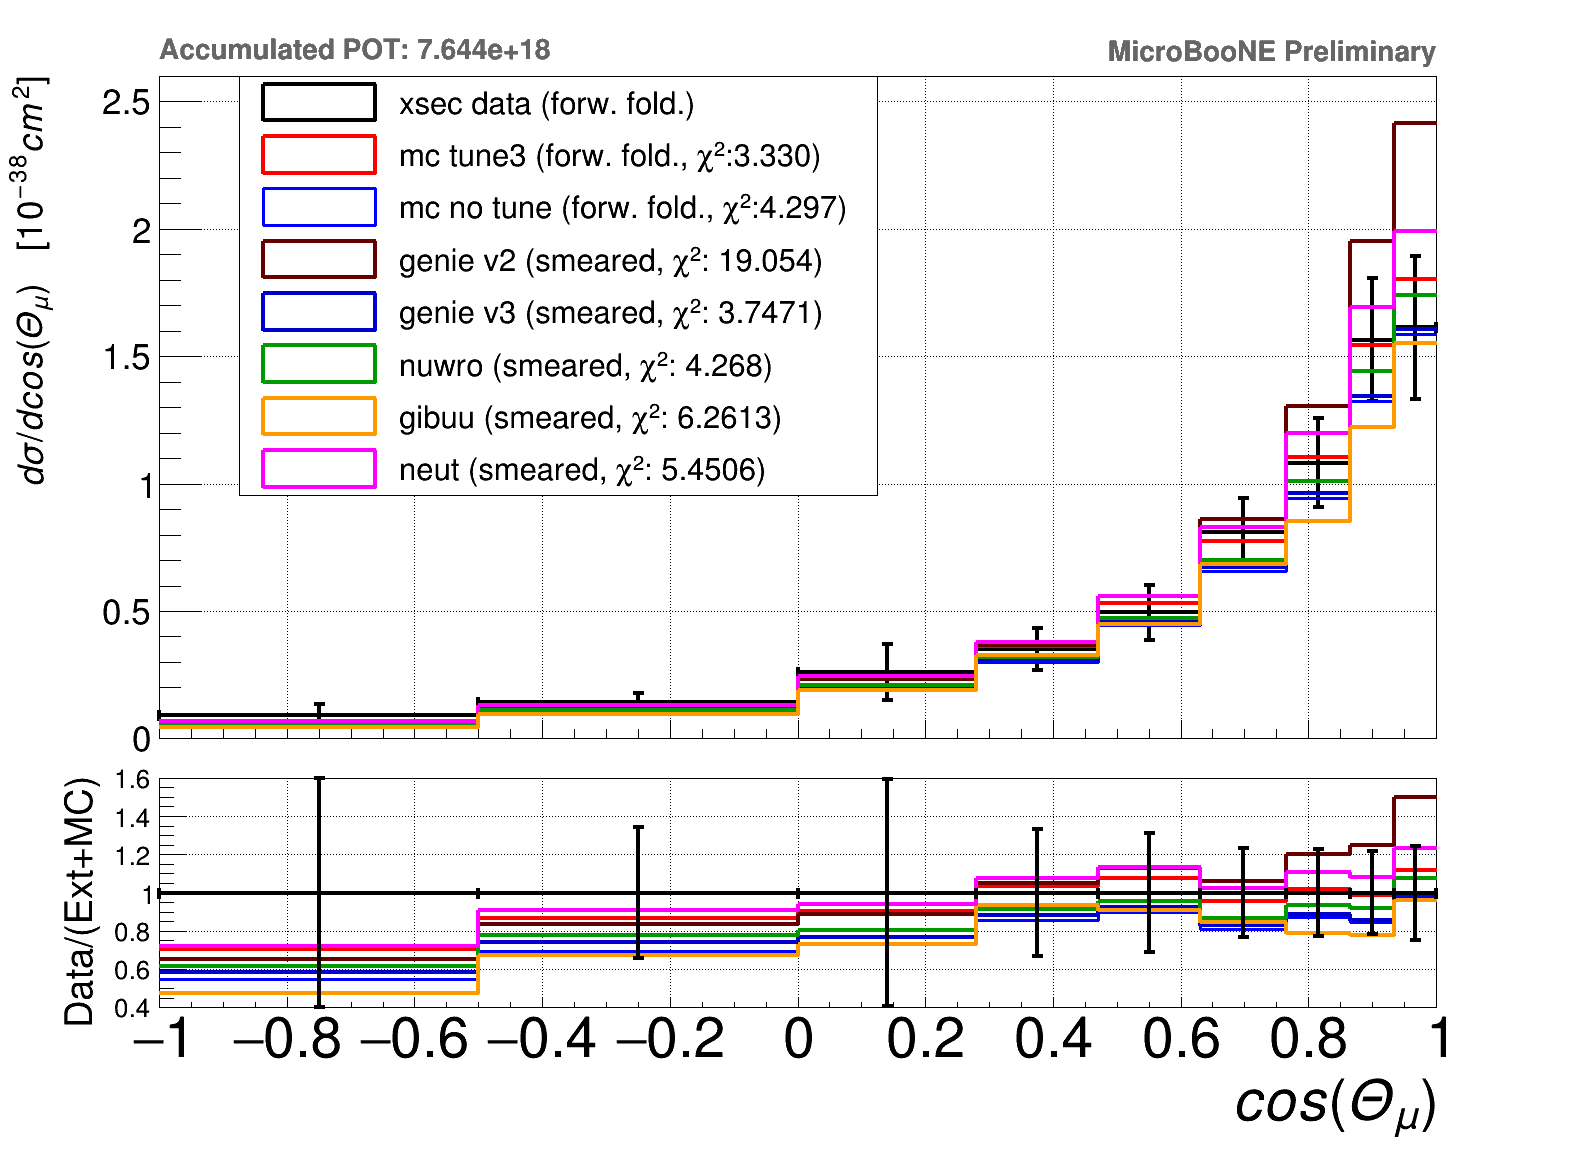

In [14]:
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

f_g2 = ROOT.TFile.Open(path+"ccinc_tom_genie2_res.root", 'read')
f_g3 = ROOT.TFile.Open(path+"ccinc_tom_genie3_res.root", 'read')
f_gibuu = ROOT.TFile.Open(path+"ccinc_tom_gibuu_res.root", 'read')
f_nuwro = ROOT.TFile.Open(path+"ccinc_tom_nuwro_res.root", 'read')
f_neut = ROOT.TFile.Open(path+"ccinc_tom_neut_res.root", 'read')

h_xsec_data = f_cv.Get('xsec_data')
#h_xsec_data.Scale(1e-38)
h_mc = f_cv.Get('xsec_mc')
h_mc.SetFillColor(0)
h_mc_noTune = f_cv.Get('xsec_mc_noTune')
h_mc_noTune.SetFillColor(0)
h_covariance_matrix = f_cv.Get('covariance_matrix')
h_smearing_matrix = f_cv.Get('smearing_matrix')

res = np.zeros((9))
chi2_nom =h_xsec_data.Chi2Test(h_mc,"WW P CHI2",res)
chi2_nom =h_xsec_data.Chi2Test(h_mc_noTune,"WW P CHI2",res)


binnum = h_xsec_data.GetNbinsX()

h_xsec_data.GetYaxis().SetTitleSize(0.05)
h_xsec_data.GetYaxis().SetTitleOffset(0.0)
h_xsec_data.GetYaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleSize(0.05)
h_xsec_data.GetXaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleOffset(1)
h_xsec_data.SetLineColor(ROOT.kBlack)
h_xsec_data.SetLineWidth(4)
h_xsec_data.SetMinimum(0)
h_xsec_data.SetMaximum(2.6)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_MC')
h_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_MC')
h_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_MC')
h_neut = f_neut.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_MC')
h_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_MC')


h_g2.Scale(1e38)
h_g3.Scale(1e38)
h_nuwro.Scale(1e38)
h_gibuu.Scale(1e38)
h_neut.Scale(1e38)

h_nuwro.SetLineColor(ROOT.kGreen+2)
h_gibuu.SetLineColor(ROOT.kOrange-3)
h_g2.SetLineColor(ROOT.kRed+3)
h_g3.SetLineColor(ROOT.kBlue+1)
h_neut.SetLineColor(ROOT.kMagenta)

h_nuwro.SetLineWidth(4)
h_gibuu.SetLineWidth(4)
h_g2.SetLineWidth(4)
h_g3.SetLineWidth(4)
h_neut.SetLineWidth(4)


h_xsec_data.GetYaxis().SetTitleSize(0.05)
h_xsec_data.GetYaxis().SetTitleOffset(0.0)
h_xsec_data.GetYaxis().SetLabelSize(0.05)
#h_overlay_sig.GetXaxis().SetTitleSize(0.05)
#h_overlay_sig.GetXaxis().SetLabelSize(0.05)


h_xsec_data.Draw('E1')
h_mc.Draw('same hist')
h_mc_noTune.Draw('same hist')

h_g2.Draw('same hist')
h_g3.Draw('same hist')
h_nuwro.Draw('same hist')
h_neut.Draw('same hist')
h_gibuu.Draw('same hist')

# calculate the chi2 for all these models..
#h_covariance_matrix
cov_matrix = np.zeros((binnum,binnum))
for i in range(1,binnum+1):
    for j in range(1,binnum+1):
        cov_matrix[i-1][j-1] = h_covariance_matrix.GetBinContent(i,j)
        
print cov_matrix

xsec_diff_mc = np.zeros((binnum))
xsec_diff_mc_noTune = np.zeros((binnum))

for i in range(1,binnum+1):
    #print h_xsec_data.GetBinContent(i), h_mc.GetBinContent(i)
    xsec_diff_mc[i-1] = (h_xsec_data.GetBinContent(i) - h_mc.GetBinContent(i) )#*1e-38
    xsec_diff_mc_noTune[i-1] = (h_xsec_data.GetBinContent(i) - h_mc_noTune.GetBinContent(i) )#*1e-38
    
cov_matrix_inv = np.linalg.inv(cov_matrix)

chi2_mc = np.dot(xsec_diff_mc,cov_matrix_inv)
chi2_mc = np.dot(chi2_mc,xsec_diff_mc)

chi2_mc_noTune = np.dot(xsec_diff_mc_noTune,cov_matrix_inv)
chi2_mc_noTune = np.dot(chi2_mc_noTune,xsec_diff_mc_noTune)


legend = ROOT.TLegend(0.15,0.35,0.55,0.9); #LEGEND RIGHT
legend.AddEntry(h_xsec_data,'xsec data (forw. fold.)',"f")
legend.AddEntry(h_mc,'mc tune3 (forw. fold., #chi^{2}:'+'{:04.3f})'.format(chi2_mc),"f") #+'/{:04.2f})'.format(chi2_mc/6)
legend.AddEntry(h_mc_noTune,'mc no tune (forw. fold., #chi^{2}:'+'{:04.3f})'.format(chi2_mc_noTune),"f")
legend.AddEntry(h_g2,'genie v2 (smeared, #chi^{2}: '+h_g2.GetTitle()+')',"f")
legend.AddEntry(h_g3,'genie v3 (smeared, #chi^{2}: '+h_g3.GetTitle()+')',"f")
legend.AddEntry(h_nuwro,'nuwro (smeared, #chi^{2}: '+h_nuwro.GetTitle()+')',"f")
legend.AddEntry(h_gibuu,'gibuu (smeared, #chi^{2}: '+h_gibuu.GetTitle()+')',"f")
legend.AddEntry(h_neut,'neut (smeared, #chi^{2}: '+h_neut.GetTitle()+')',"f")
#legend.AddEntry(h_neut,'neut',"f")
legend.Draw()

prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()

h_xsec_data.GetXaxis().SetLabelOffset(999);
h_xsec_data.GetXaxis().SetTitleOffset(999);
h_xsec_data.GetXaxis().SetLabelSize(0);
h_xsec_data.GetXaxis().SetTitleSize(0);

c1.cd()
h_xsec_data.GetXaxis().SetLabelOffset(0);
h_xsec_data.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()

h_xsec_data_ratio = h_xsec_data.Clone()
h_xsec_data_ratio.Divide(h_xsec_data)
h_mc_ratio = h_mc.Clone()
h_mc_ratio.Divide(h_xsec_data)
h_mc_noTune_ratio = h_mc_noTune.Clone()
h_mc_noTune_ratio.Divide(h_xsec_data)

h_g2_ratio = h_g2.Clone()
h_g2_ratio.Divide(h_xsec_data)
h_g3_ratio = h_g3.Clone()
h_g3_ratio.Divide(h_xsec_data)
h_nuwro_ratio = h_nuwro.Clone()
h_nuwro_ratio.Divide(h_xsec_data)
h_gibuu_ratio = h_gibuu.Clone()
h_gibuu_ratio.Divide(h_xsec_data)
h_neut_ratio = h_neut.Clone()
h_neut_ratio.Divide(h_xsec_data)

h_xsec_data_ratio.SetMinimum(.4)
h_xsec_data_ratio.SetMaximum(1.6)
#h_overlay_sig_ratio.SetFillColor(0)
h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)

h_xsec_data_ratio.Draw('E1')
h_mc_ratio.Draw('hist same')
h_mc_noTune_ratio.Draw('same hist')
h_g2_ratio.Draw('same hist')
h_g3_ratio.Draw('hist same')
h_nuwro_ratio.Draw('hist same')
h_gibuu_ratio.Draw('hist same')
h_neut_ratio.Draw('hist same')

h_xsec_data_ratio.Draw('E1 same')



c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr_theta_ratio.png")
c1.SaveAs(outputdir_root + "h_xsec_corr_theta_ratio.root")
c1.SaveAs(outputdir_pdf + "h_xsec_corr_theta_ratio.pdf")

#h_data.Write("h_xsec_data")
#h_overlay_sig.Write("h_xsec_MC")

In [28]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/png/h_xsec_generators_chi2.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/root/h_xsec_generators_chi2.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/pdf/h_xsec_generators_chi2.pdf has been created


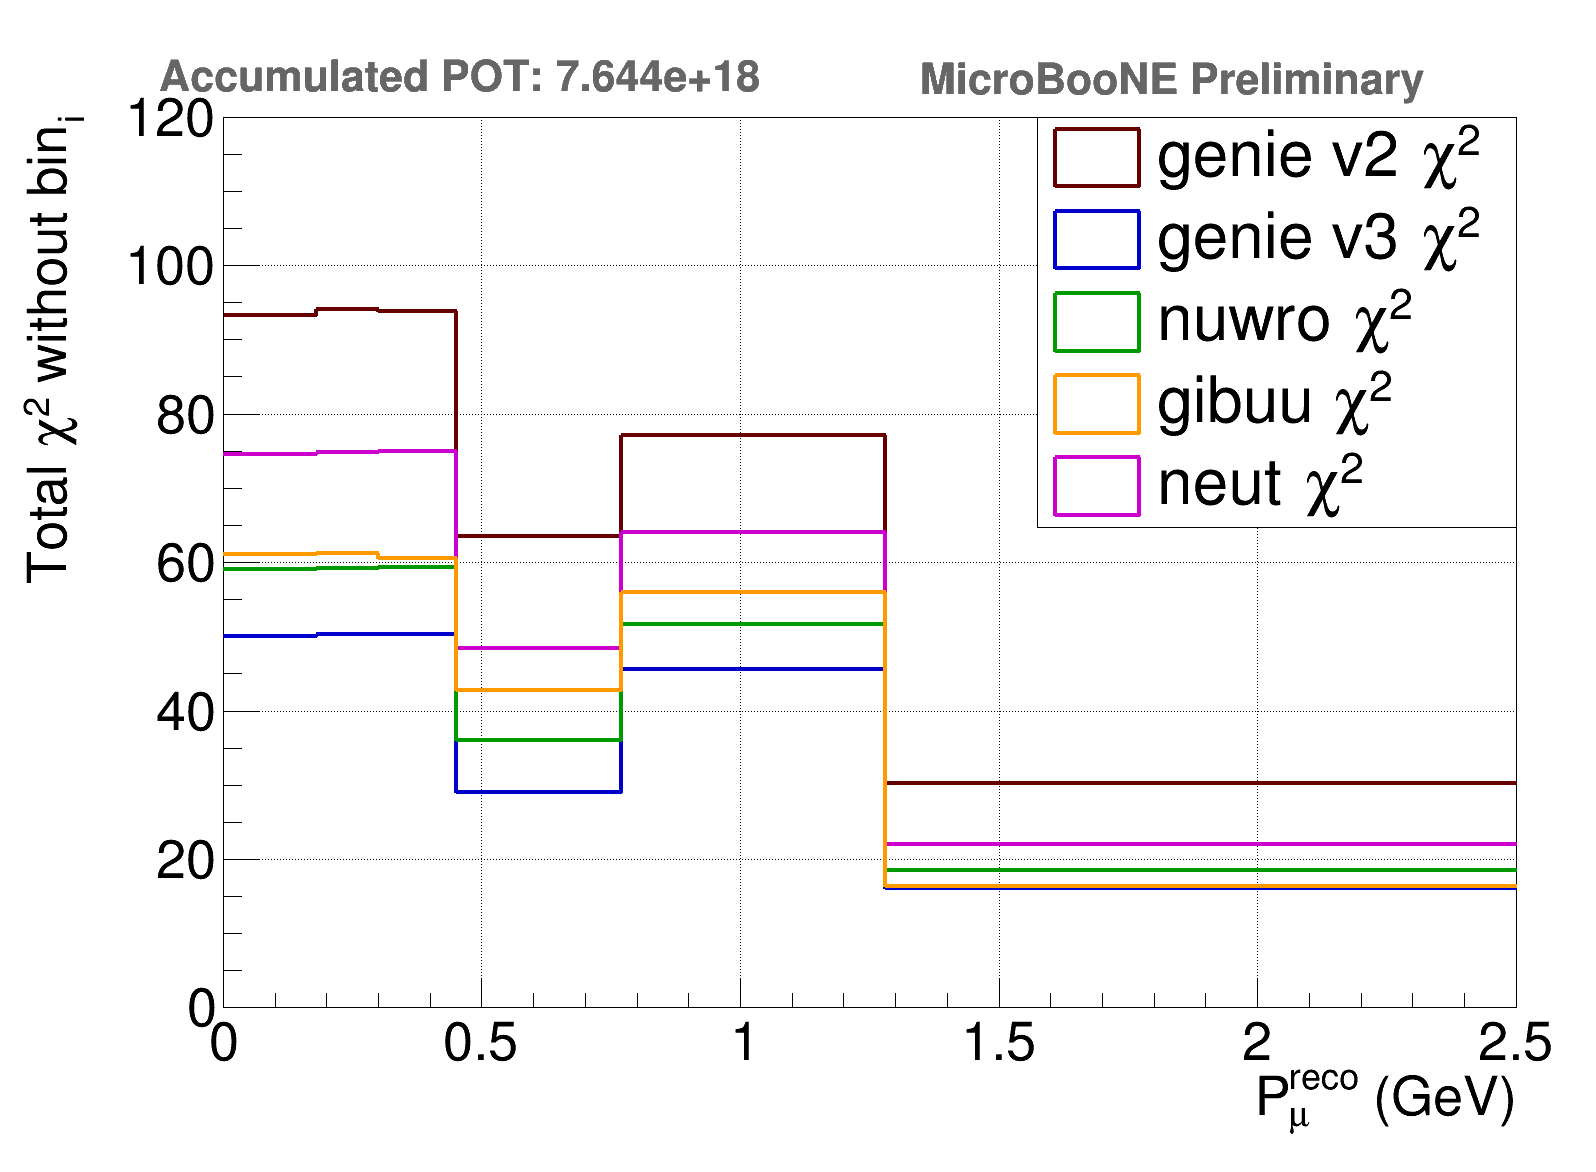

In [29]:
#path_cv = '/home/tmettler/Desktop/weighted/xsec_filesV4/'
#path = '/home/tmettler/Share/data_hist/'
f_cv = ROOT.TFile.Open(path_cv+"xsec_theta_result.root", 'read')
'''
f_g2 = ROOT.TFile.Open(path+"ccinc_tom_genie2.root", 'read')
f_g3 = ROOT.TFile.Open(path+"ccinc_tom_genie3.root", 'read')
f_gibuu = ROOT.TFile.Open(path+"ccinc_tom_gibuu.root", 'read')
f_neut = ROOT.TFile.Open(path+"test_neut.root", 'read')
f_nuwro = ROOT.TFile.Open(path+"ccinc_tom_nuwro.root", 'read')
'''
h_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_Chi2NMinusOne')
h_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_Chi2NMinusOne')
h_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_Chi2NMinusOne')
h_neut = f_neut.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_Chi2NMinusOne')
h_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_Chi2NMinusOne')

h_nuwro.SetLineColor(ROOT.kGreen+2)
h_gibuu.SetLineColor(ROOT.kOrange-3)
h_g2.SetLineColor(ROOT.kRed+3)
h_g3.SetLineColor(ROOT.kBlue+1)
h_neut.SetLineColor(ROOT.kMagenta+1)

h_nuwro.SetLineWidth(4)
h_gibuu.SetLineWidth(4)
h_g2.SetLineWidth(4)
h_g3.SetLineWidth(4)
h_neut.SetLineWidth(4)

h_g2.GetYaxis().SetTitleSize(0.05)
h_g2.GetYaxis().SetTitleOffset(0.0)
h_g2.GetYaxis().SetLabelSize(0.05)
h_g2.GetXaxis().SetTitleSize(0.05)
h_g2.GetXaxis().SetLabelSize(0.05)
h_g2.GetXaxis().SetTitleOffset(1)
h_g2.SetMinimum(0)
h_g2.SetMaximum(120)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_g2.Draw('hist')
h_g3.Draw('same hist')
h_nuwro.Draw('same hist')
h_neut.Draw('same hist')
h_gibuu.Draw('same hist')



legend = ROOT.TLegend(0.65,0.55,0.95,0.9); #LEGEND RIGHT
legend.AddEntry(h_g2,'genie v2 #chi^{2}',"f")
legend.AddEntry(h_g3,'genie v3 #chi^{2}',"f")
legend.AddEntry(h_nuwro,'nuwro #chi^{2}',"f")
legend.AddEntry(h_gibuu,'gibuu #chi^{2}',"f")
legend.AddEntry(h_neut,'neut #chi^{2}',"f")
legend.Draw()

prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()


c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_generators_chi2.png")
c1.SaveAs(outputdir_root + "h_xsec_generators_chi2.root")
c1.SaveAs(outputdir_pdf + "h_xsec_generators_chi2.pdf")


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/png/h_xsec_generators_chi2_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/root/h_xsec_generators_chi2_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/pdf/h_xsec_generators_chi2_theta.pdf has been created


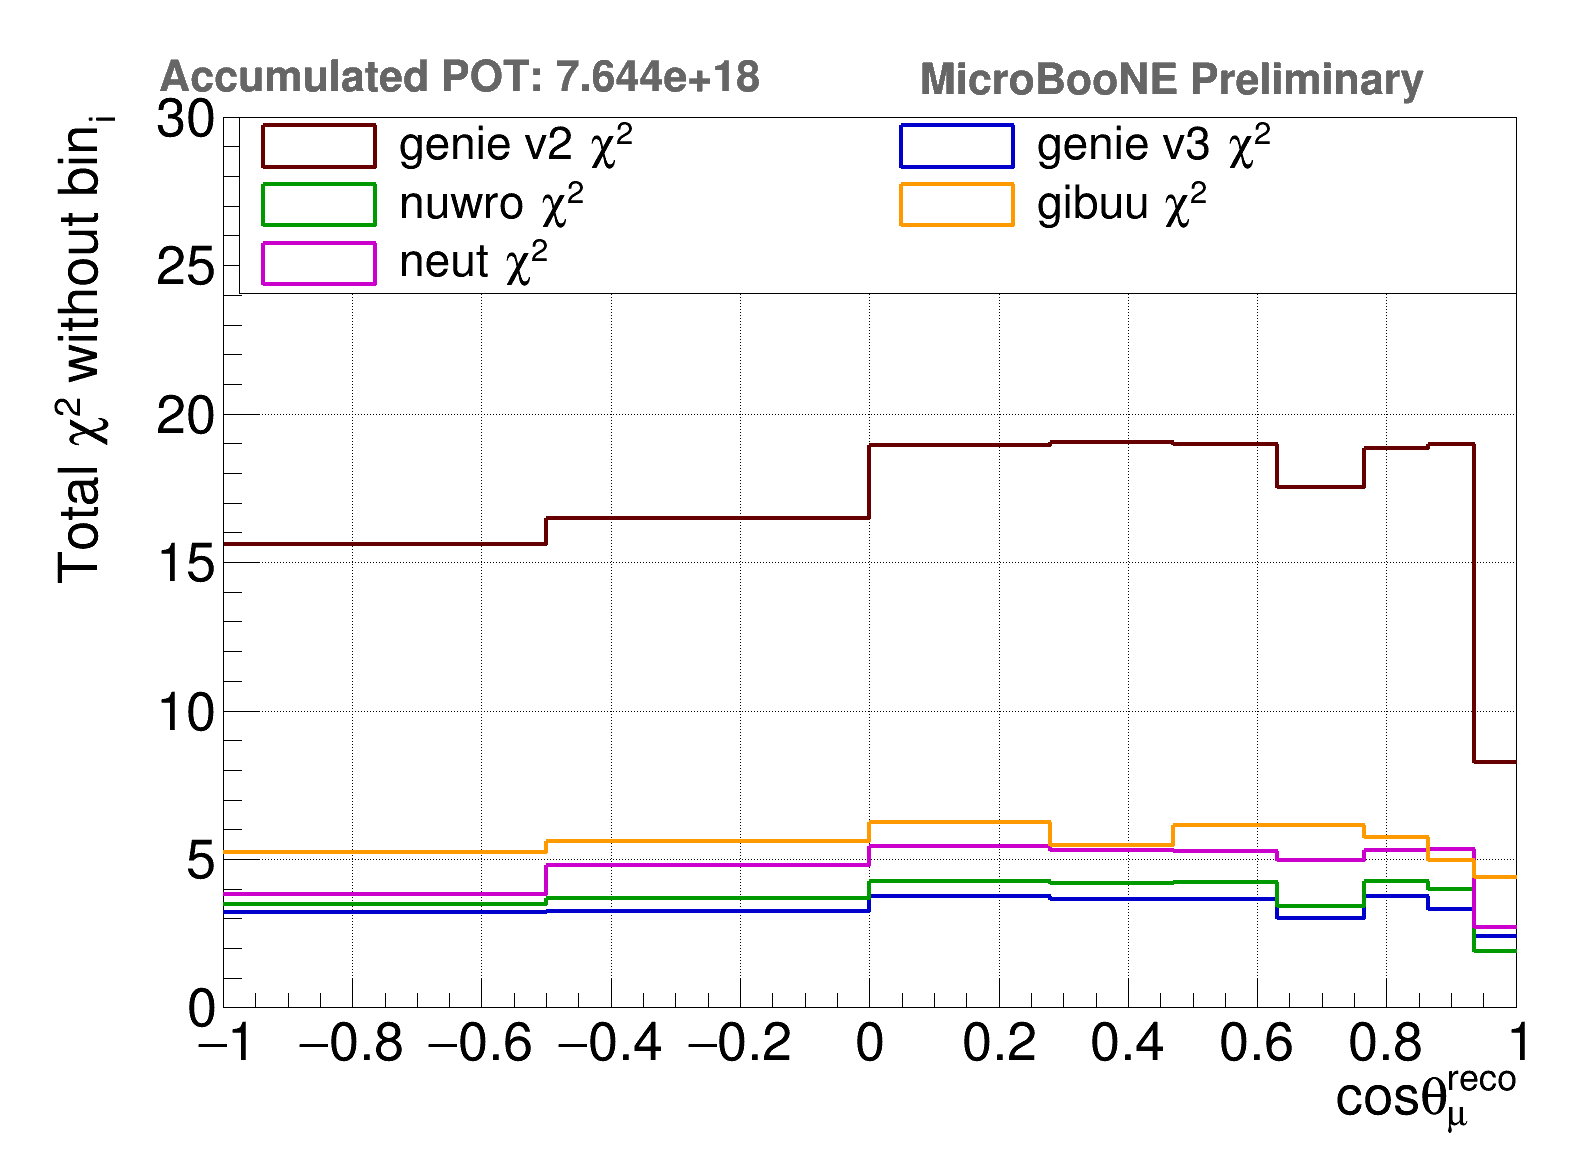

In [30]:
#path_cv = '/home/tmettler/Desktop/weighted/xsec_filesV4/'
#path = '/home/tmettler/Share/data_hist/'
f_cv = ROOT.TFile.Open(path_cv+"xsec_theta_result.root", 'read')
'''
f_g2 = ROOT.TFile.Open(path+"ccinc_tom_genie2.root", 'read')
f_g3 = ROOT.TFile.Open(path+"ccinc_tom_genie3.root", 'read')
f_gibuu = ROOT.TFile.Open(path+"ccinc_tom_gibuu.root", 'read')
f_neut = ROOT.TFile.Open(path+"test_neut.root", 'read')
f_nuwro = ROOT.TFile.Open(path+"ccinc_tom_nuwro.root", 'read')
'''
h_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_Chi2NMinusOne')
h_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_Chi2NMinusOne')
h_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_Chi2NMinusOne')
h_neut = f_neut.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_Chi2NMinusOne')
h_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_Chi2NMinusOne')

h_nuwro.SetLineColor(ROOT.kGreen+2)
h_gibuu.SetLineColor(ROOT.kOrange-3)
h_g2.SetLineColor(ROOT.kRed+3)
h_g3.SetLineColor(ROOT.kBlue+1)
h_neut.SetLineColor(ROOT.kMagenta+1)

h_nuwro.SetLineWidth(4)
h_gibuu.SetLineWidth(4)
h_g2.SetLineWidth(4)
h_g3.SetLineWidth(4)
h_neut.SetLineWidth(4)

h_g2.GetYaxis().SetTitleSize(0.05)
h_g2.GetYaxis().SetTitleOffset(0.0)
h_g2.GetYaxis().SetLabelSize(0.05)
h_g2.GetXaxis().SetTitleSize(0.05)
h_g2.GetXaxis().SetLabelSize(0.05)
h_g2.GetXaxis().SetTitleOffset(1)
h_g2.SetMinimum(0)
h_g2.SetMaximum(30)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_g2.Draw('hist')
h_g3.Draw('same hist')
h_nuwro.Draw('same hist')
h_neut.Draw('same hist')
h_gibuu.Draw('same hist')



legend = ROOT.TLegend(0.15,0.75,0.95,0.9); #LEGEND RIGHT
legend.SetNColumns(2)
legend.AddEntry(h_g2,'genie v2 #chi^{2}',"f")
legend.AddEntry(h_g3,'genie v3 #chi^{2}',"f")
legend.AddEntry(h_nuwro,'nuwro #chi^{2}',"f")
legend.AddEntry(h_gibuu,'gibuu #chi^{2}',"f")
legend.AddEntry(h_neut,'neut #chi^{2}',"f")
legend.Draw()

prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()


c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_generators_chi2_theta.png")
c1.SaveAs(outputdir_root + "h_xsec_generators_chi2_theta.root")
c1.SaveAs(outputdir_pdf + "h_xsec_generators_chi2_theta.pdf")


Chi2 = 356.522599, Prob = 6.89763e-75, NDF = 5, igood = 0
Chi2 = 937.285573, Prob = 2.26485e-200, NDF = 5, igood = 0
Chi2 = 722.043481, Prob = 8.40848e-154, NDF = 5, igood = 0
Chi2 = 588.920352, Prob = 5.00823e-125, NDF = 5, igood = 0
Chi2 = 95.156264, Prob = 5.53571e-19, NDF = 5, igood = 0
Chi2 = 834.769425, Prob = 3.47417e-178, NDF = 5, igood = 0


Warning in <TFile::Init>: file /home/tmettler/Desktop/weighted/xsec_momentum_fit_res_both/xsec_momentum_fit.root probably not closed, trying to recover
Info in <TFile::Recover>: /home/tmettler/Desktop/weighted/xsec_momentum_fit_res_both/xsec_momentum_fit.root, recovered key TH1F:mom_truth_sig at address 410
Info in <TFile::Recover>: /home/tmettler/Desktop/weighted/xsec_momentum_fit_res_both/xsec_momentum_fit.root, recovered key TH1F:mom_truth at address 843
Info in <TFile::Recover>: /home/tmettler/Desktop/weighted/xsec_momentum_fit_res_both/xsec_momentum_fit.root, recovered key TH1F:mom_reco_0 at address 1273
Info in <TFile::Recover>: /home/tmettler/Desktop/weighted/xsec_momentum_fit_res_both/xsec_momentum_fit.root, recovered key TH1F:mom_reco_1 at address 2846
Info in <TFile::Recover>: /home/tmettler/Desktop/weighted/xsec_momentum_fit_res_both/xsec_momentum_fit.root, recovered key TH1F:mom_reco_2 at address 5254
Info in <TFile::Recover>: /home/tmettler/Desktop/weighted/xsec_momentum_f

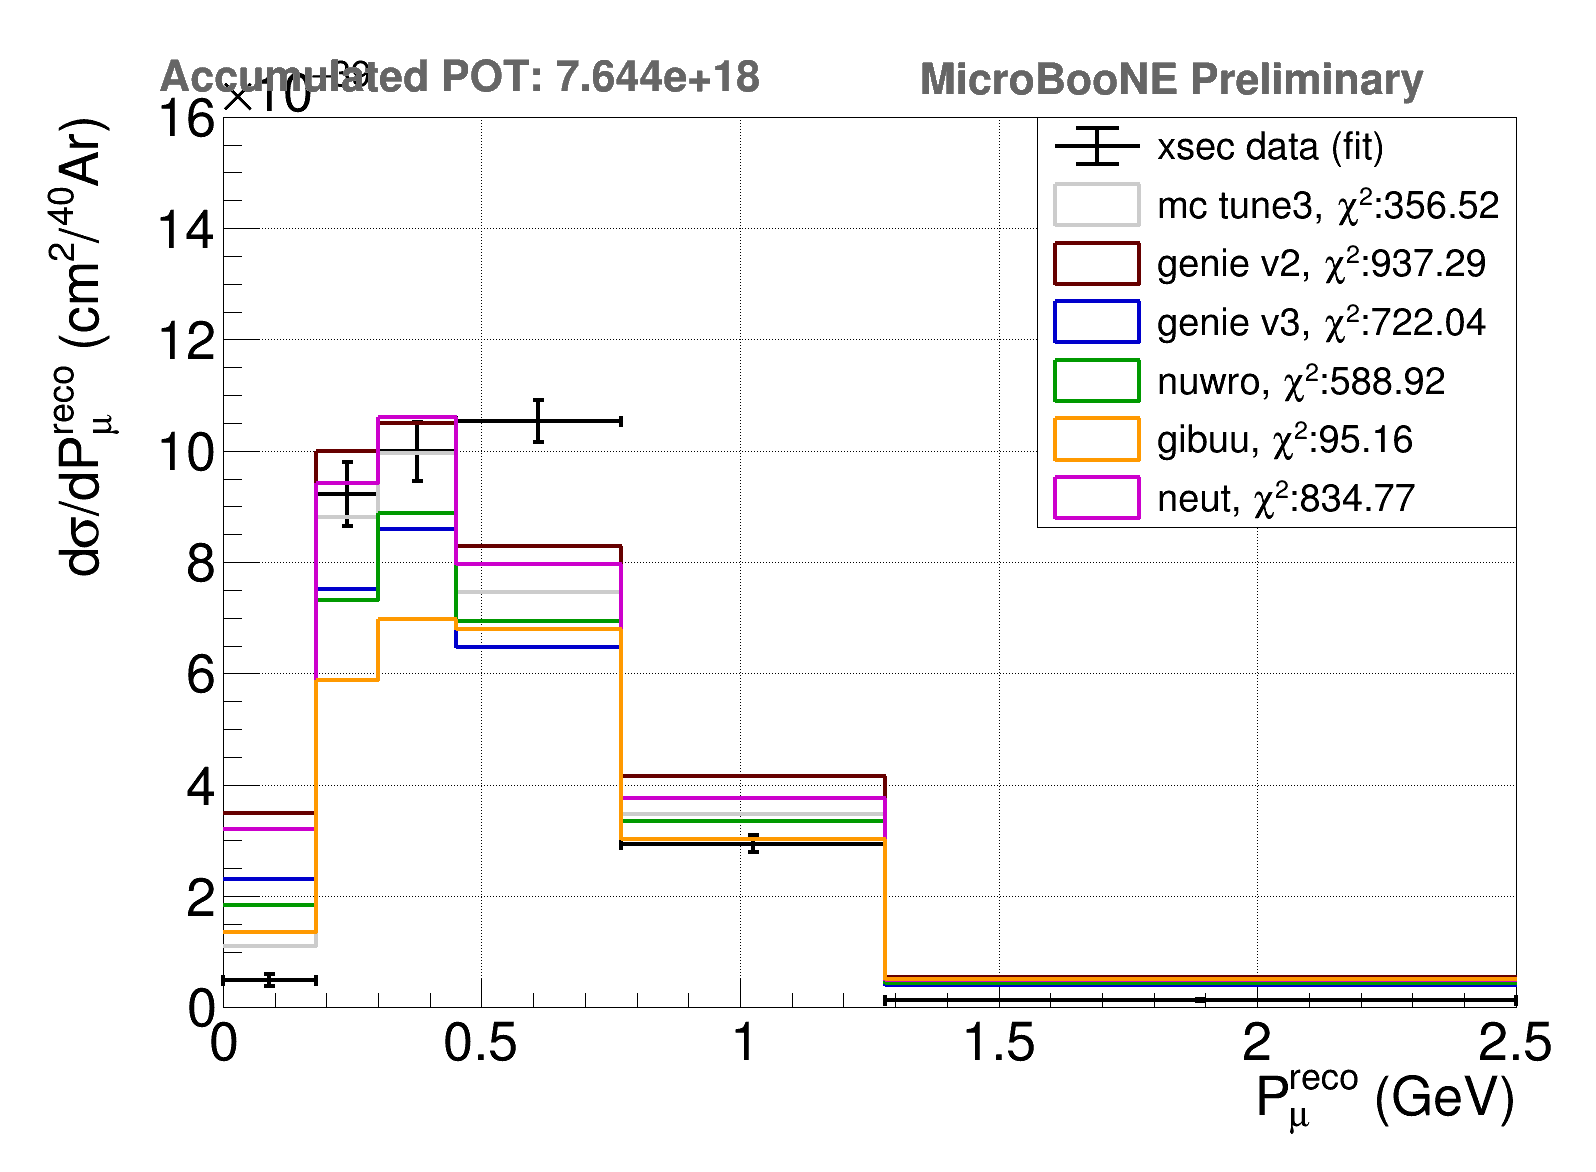

In [9]:
path_cv = '/home/tmettler/Desktop/weighted/xsec_momentum_fit_res_both/'
path = '/home/tmettler/Share/data_hist/'
f_cv = ROOT.TFile.Open(path_cv+"xsec_momentum_fit.root", 'read')

'''f_g2 = ROOT.TFile.Open(path+"ccinc_tom_genie2.root", 'read')
f_g3 = ROOT.TFile.Open(path+"ccinc_tom_genie3.root", 'read')
f_gibuu = ROOT.TFile.Open(path+"ccinc_tom_gibuu.root", 'read')
f_neut = ROOT.TFile.Open(path+"test_neut.root", 'read')
f_nuwro = ROOT.TFile.Open(path+"ccinc_tom_nuwro.root", 'read')
'''
h_xsec_data = f_cv.Get('h_xsec_data')
h_xsec_mc = f_cv.Get('h_xsec_MC')
h_xsec_data.Scale(1e-38)
h_xsec_mc.Scale(1e-38)
h_xsec_mc.SetFillColor(0)

h_xsec_data.SetLineColor(ROOT.kBlack)
h_xsec_data.SetLineWidth(4)
h_xsec_mc.SetLineColor(ROOT.kGray)
h_xsec_mc.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC_truth')
h_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC_truth')
h_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC_truth')
h_neut = f_neut.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC_truth')
h_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_1DPmu_nu_MC_truth')

h_nuwro.SetLineColor(ROOT.kGreen+2)
h_gibuu.SetLineColor(ROOT.kOrange-3)
h_g2.SetLineColor(ROOT.kRed+3)
h_g3.SetLineColor(ROOT.kBlue+1)
h_neut.SetLineColor(ROOT.kMagenta+1)

h_nuwro.SetLineWidth(4)
h_gibuu.SetLineWidth(4)
h_g2.SetLineWidth(4)
h_g3.SetLineWidth(4)
h_neut.SetLineWidth(4)

h_g2.GetYaxis().SetTitleSize(0.05)
h_g2.GetYaxis().SetTitleOffset(0.0)
h_g2.GetYaxis().SetLabelSize(0.05)
h_g2.GetXaxis().SetTitleSize(0.05)
h_g2.GetXaxis().SetLabelSize(0.05)
h_g2.GetXaxis().SetTitleOffset(1)
h_g2.SetMinimum(0)
h_g2.SetMaximum(1.6e-38)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_g2.Draw('hist')
h_xsec_data.Draw("same E1")
h_xsec_mc.Draw("same hist")
h_g2.Draw('same hist')
h_g3.Draw('same hist')
h_nuwro.Draw('same hist')
h_neut.Draw('same hist')
h_gibuu.Draw('same hist')

res = np.zeros((6))
chi2_mc =h_xsec_data.Chi2Test(h_xsec_mc,"WW P CHI2",res)
chi2_g2 =h_xsec_data.Chi2Test(h_g2,"WW P CHI2",res)
chi2_g3 =h_xsec_data.Chi2Test(h_g3,"WW P CHI2",res)
chi2_nuwro =h_xsec_data.Chi2Test(h_nuwro,"WW P CHI2",res)
chi2_gibuu =h_xsec_data.Chi2Test(h_gibuu,"WW P CHI2",res)
chi2_neut =h_xsec_data.Chi2Test(h_neut,"WW P CHI2",res)

legend = ROOT.TLegend(0.65,0.55,0.95,0.9); #LEGEND RIGHT
legend.AddEntry(h_xsec_data,'xsec data (fit)',"lep")
legend.AddEntry(h_xsec_mc,'mc tune3, #chi^{2}:'+'{:04.2f}'.format(chi2_mc),"f")
legend.AddEntry(h_g2,'genie v2, #chi^{2}:'+'{:04.2f}'.format(chi2_g2),"f")
legend.AddEntry(h_g3,'genie v3, #chi^{2}:'+'{:04.2f}'.format(chi2_g3),"f")
legend.AddEntry(h_nuwro,'nuwro, #chi^{2}:'+'{:04.2f}'.format(chi2_nuwro),"f")
legend.AddEntry(h_gibuu,'gibuu, #chi^{2}:'+'{:04.2f}'.format(chi2_gibuu),"f")
legend.AddEntry(h_neut,'neut, #chi^{2}:'+'{:04.2f}'.format(chi2_neut),"f")
#legend.AddEntry(h_neut,'neut',"f")
legend.Draw()

prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()


c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_generators_fit.png")
c1.SaveAs(outputdir_root + "h_xsec_generators_fit.root")
c1.SaveAs(outputdir_pdf + "h_xsec_generators_fit.pdf")


Chi2 = 12.361104, Prob = 0.135805, NDF = 8, igood = 0
Chi2 = 40.525141, Prob = 2.55703e-06, NDF = 8, igood = 0
Chi2 = 18.679403, Prob = 0.0166715, NDF = 8, igood = 0
Chi2 = 22.041660, Prob = 0.00483927, NDF = 8, igood = 0
Chi2 = 19.847486, Prob = 0.0109287, NDF = 8, igood = 0
Chi2 = 19.062543, Prob = 0.0145287, NDF = 8, igood = 0


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/png/h_xsec_generators_theta_fit.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/root/h_xsec_generators_theta_fit.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_comparsion_generators/pdf/h_xsec_generators_theta_fit.pdf has been created


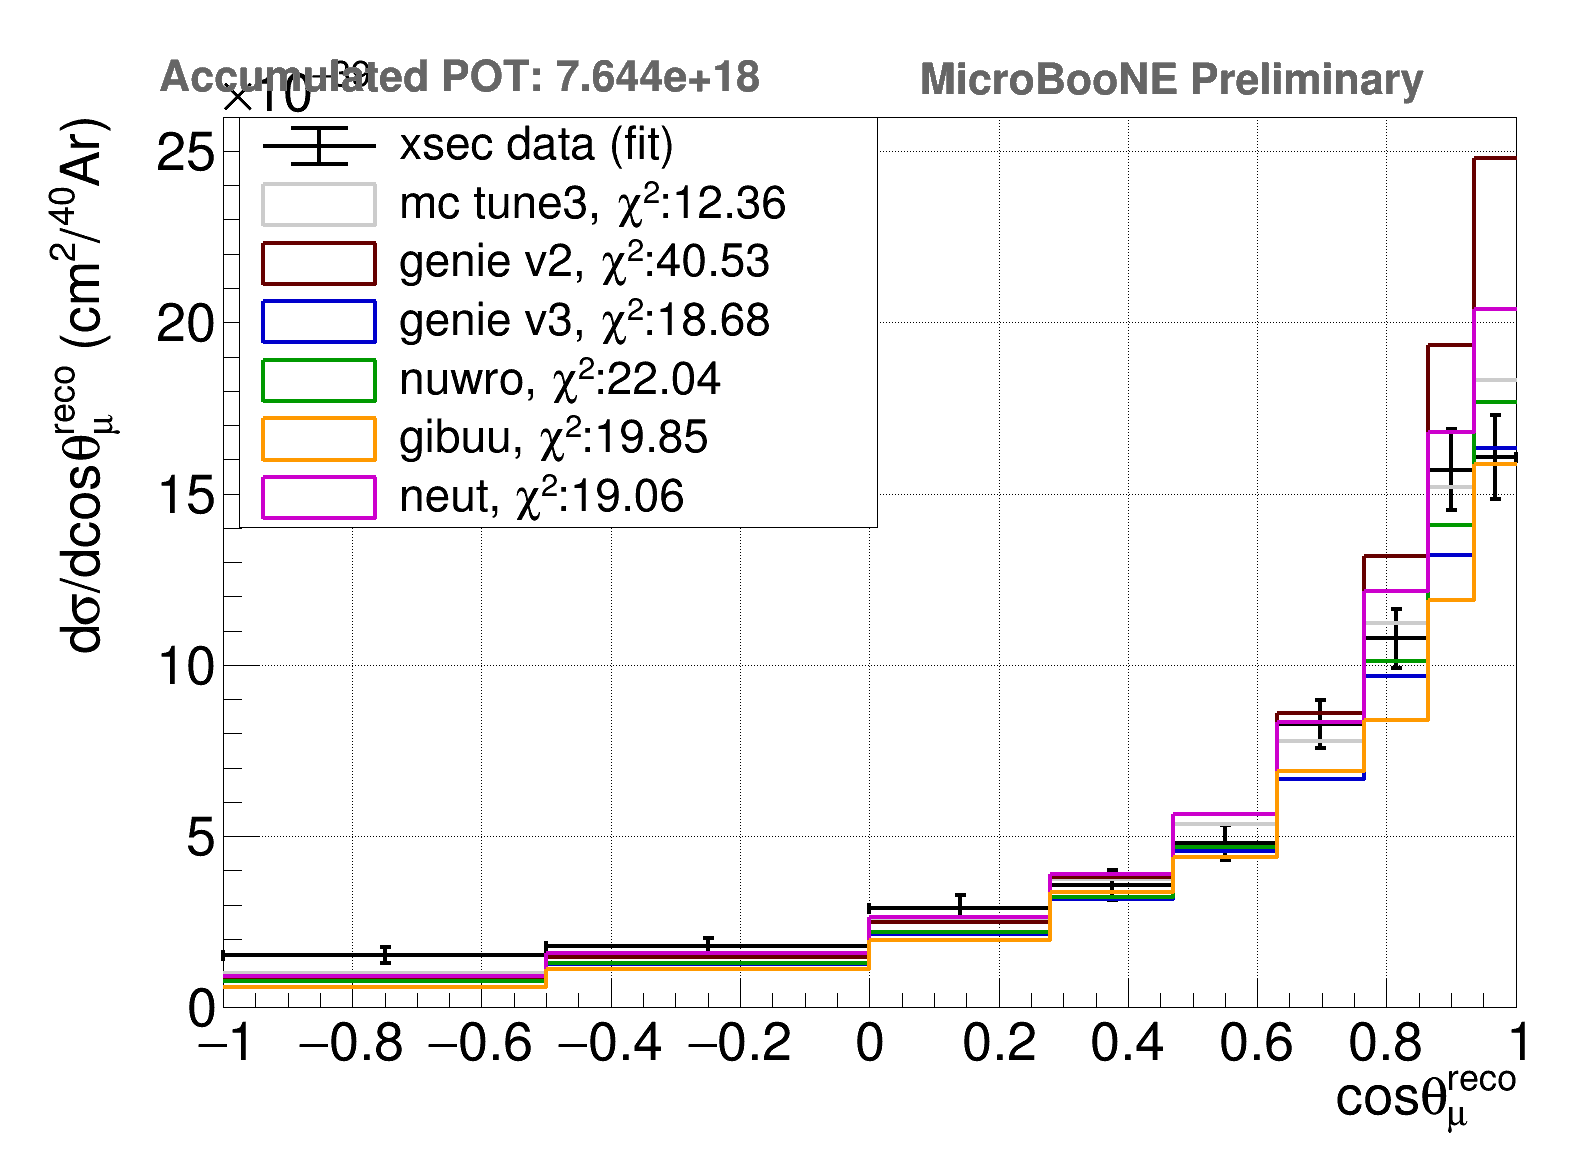

In [10]:
path_cv = '/home/tmettler/Desktop/weighted/xsec_theta_fit/'
path = '/home/tmettler/Share/data_hist/'
f_cv = ROOT.TFile.Open(path_cv+"xsec_theta_fit.root", 'read')

'''f_g2 = ROOT.TFile.Open(path+"ccinc_tom_genie2.root", 'read')
f_g3 = ROOT.TFile.Open(path+"ccinc_tom_genie3.root", 'read')
f_gibuu = ROOT.TFile.Open(path+"ccinc_tom_gibuu.root", 'read')
f_neut = ROOT.TFile.Open(path+"test_neut.root", 'read')
f_nuwro = ROOT.TFile.Open(path+"ccinc_tom_nuwro.root", 'read')
'''
h_xsec_data = f_cv.Get('h_xsec_data')
h_xsec_mc = f_cv.Get('h_xsec_MC')
h_xsec_data.Scale(1e-38)
h_xsec_mc.Scale(1e-38)
h_xsec_mc.SetFillColor(0)

h_xsec_data.SetLineColor(ROOT.kBlack)
h_xsec_data.SetLineWidth(4)
h_xsec_mc.SetLineColor(ROOT.kGray)
h_xsec_mc.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_MC_truth')
h_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_MC_truth')
h_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_MC_truth')
h_neut = f_neut.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_MC_truth')
h_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_1Dcosmu_nu_MC_truth')

h_nuwro.SetLineColor(ROOT.kGreen+2)
h_gibuu.SetLineColor(ROOT.kOrange-3)
h_g2.SetLineColor(ROOT.kRed+3)
h_g3.SetLineColor(ROOT.kBlue+1)
h_neut.SetLineColor(ROOT.kMagenta+1)

h_nuwro.SetLineWidth(4)
h_gibuu.SetLineWidth(4)
h_g2.SetLineWidth(4)
h_g3.SetLineWidth(4)
h_neut.SetLineWidth(4)

h_g2.GetYaxis().SetTitleSize(0.05)
h_g2.GetYaxis().SetTitleOffset(0.0)
h_g2.GetYaxis().SetLabelSize(0.05)
h_g2.GetXaxis().SetTitleSize(0.05)
h_g2.GetXaxis().SetLabelSize(0.05)
h_g2.GetXaxis().SetTitleOffset(1)
h_g2.SetMinimum(0)
h_g2.SetMaximum(2.6e-38)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_g2.Draw('hist')
h_xsec_data.Draw("same E1")
h_xsec_mc.Draw("same hist")
h_g2.Draw('same hist')
h_g3.Draw('same hist')
h_nuwro.Draw('same hist')
h_neut.Draw('same hist')
h_gibuu.Draw('same hist')

res = np.zeros((9))
chi2_mc =h_xsec_data.Chi2Test(h_xsec_mc,"WW P CHI2",res)
chi2_g2 =h_xsec_data.Chi2Test(h_g2,"WW P CHI2",res)
chi2_g3 =h_xsec_data.Chi2Test(h_g3,"WW P CHI2",res)
chi2_nuwro =h_xsec_data.Chi2Test(h_nuwro,"WW P CHI2",res)
chi2_gibuu =h_xsec_data.Chi2Test(h_gibuu,"WW P CHI2",res)
chi2_neut =h_xsec_data.Chi2Test(h_neut,"WW P CHI2",res)

legend = ROOT.TLegend(0.15,0.55,0.55,0.9); #LEGEND RIGHT
legend.AddEntry(h_xsec_data,'xsec data (fit)',"lep")
legend.AddEntry(h_xsec_mc,'mc tune3, #chi^{2}:'+'{:04.2f}'.format(chi2_mc),"f")
legend.AddEntry(h_g2,'genie v2, #chi^{2}:'+'{:04.2f}'.format(chi2_g2),"f")
legend.AddEntry(h_g3,'genie v3, #chi^{2}:'+'{:04.2f}'.format(chi2_g3),"f")
legend.AddEntry(h_nuwro,'nuwro, #chi^{2}:'+'{:04.2f}'.format(chi2_nuwro),"f")
legend.AddEntry(h_gibuu,'gibuu, #chi^{2}:'+'{:04.2f}'.format(chi2_gibuu),"f")
legend.AddEntry(h_neut,'neut, #chi^{2}:'+'{:04.2f}'.format(chi2_neut),"f")
#legend.AddEntry(h_neut,'neut',"f")
legend.Draw()

prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()


c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_generators_theta_fit.png")
c1.SaveAs(outputdir_root + "h_xsec_generators_theta_fit.root")
c1.SaveAs(outputdir_pdf + "h_xsec_generators_theta_fit.pdf")
